# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Simple Linear Regression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]), array([ 5, 20, 14, 32, 22, 38]))

In [4]:
model = LinearRegression()

In [5]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

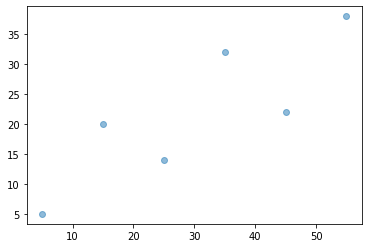

In [6]:
plt.scatter(x, y, alpha=0.5)

In [7]:
r_sq = model.score(x,y)
r_sq

0.715875613747954

In [8]:
model.intercept_

5.633333333333329

In [9]:
model.coef_

array([0.54])

In [11]:
model.predict([[60]])

array([38.03333333])

In [12]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

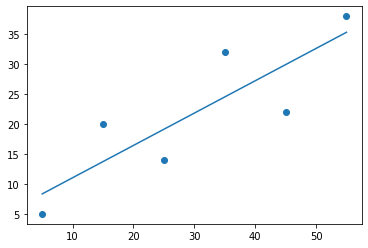

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred)

In [32]:
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [33]:
model.predict(x_new)

ValueError: shapes (5,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

## Multiple Linear Regression

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60,35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [24]:
model = LinearRegression()

In [25]:
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]), array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [26]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
r_sq = model.score(x, y)

In [28]:
print(r_sq)
print(model.intercept_)
print(model.coef_)

0.8615939258756776
5.52257927519819
[0.44706965 0.25502548]


In [34]:
model.predict([[20, 60]])

array([29.76550113])

In [35]:
x_new = np.arange(10).reshape((-1, 2))

In [36]:
model.predict(x_new)

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

## Polynomial Regression

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]), array([15, 11,  2,  8, 25, 32]))

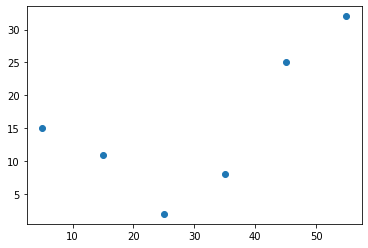

In [39]:
plt.scatter(x, y)

In [40]:
transformer = PolynomialFeatures(include_bias=False)

In [41]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [42]:
x_ = transformer.transform(x)

In [43]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [44]:
model = LinearRegression()
model.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
r_sq = model.score(x_, y)
r_sq

0.8908516262498564

In [46]:
y_pred = model.predict(x_)

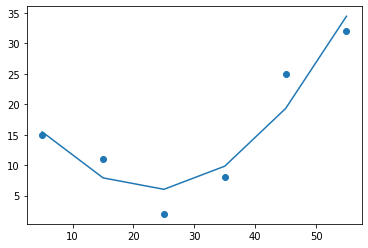

In [47]:
plt.scatter(x, y)
plt.plot(x, y_pred)

In [48]:
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

## Linear Regression on Real Dataset

### Example 1

In [54]:
import pandas as pd

In [49]:
from sklearn import linear_model

In [50]:
from sklearn import datasets
data = datasets.load_boston()

In [51]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [52]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [56]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [58]:
x = df
y = target['MEDV']

In [60]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [61]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
model.score(x,y)

0.7406426641094095

In [63]:
model.predict([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

array([30.00384338])

### Example 2

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', 
                 usecols=['horsepower', 'price'])

In [67]:
df.shape

(205, 2)

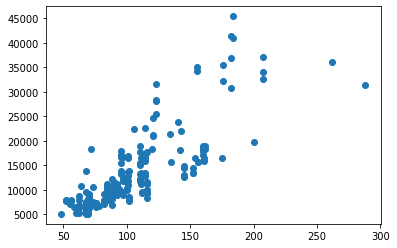

In [68]:
plt.scatter(df['horsepower'], df['price'])

In [69]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [73]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [76]:
x, y

(array([[111],
        [111],
        [154],
        [102],
        [115],
        [110],
        [110],
        [110],
        [140],
        [160],
        [101],
        [101],
        [121],
        [121],
        [121],
        [182],
        [182],
        [182],
        [ 48],
        [ 70],
        [ 70],
        [ 68],
        [ 68],
        [102],
        [ 68],
        [ 68],
        [ 68],
        [102],
        [ 88],
        [145],
        [ 58],
        [ 76],
        [ 60],
        [ 76],
        [ 76],
        [ 76],
        [ 76],
        [ 86],
        [ 86],
        [ 86],
        [ 86],
        [101],
        [100],
        [ 78],
        [ 70],
        [ 70],
        [ 90],
        [176],
        [176],
        [262],
        [ 68],
        [ 68],
        [ 68],
        [ 68],
        [ 68],
        [101],
        [101],
        [101],
        [135],
        [ 84],
        [ 84],
        [ 84],
        [ 84],
        [ 64],
        [ 84],
        [120],
        [ 

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [78]:
x_train.shape, x_test.shape

((164, 1), (41, 1))

In [79]:
model = LinearRegression()

In [80]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
model.score(x_test, y_test)

0.6534387606369152

In [82]:
model.score(x_train, y_train)

0.6528659473140381

In [83]:
model.score(x_test, y_test)

0.6534387606369152

In [84]:
y_pred = model.predict(x_test)

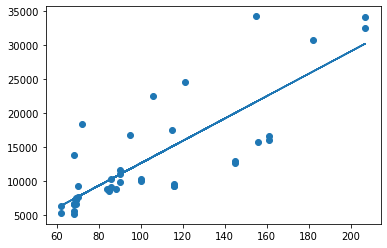

In [85]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)

In [86]:
model.predict([[100]])

array([[12620.54505414]])